# **Задание:**

сделать предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год), проанализировать поведение клиентов и сделать вывод — какой из тарифов «Смарт» и «Ультра» приносит больше денег.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдала задание:) Ты проделала большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

## Шаг 1. Открыть файл с данными и изучть общую информацию

Импортируем библиотеку pandas, методом read_csv() будем открывать данные файлы, методом info() - смотреть общую информацию о данных, методом head() -  просматривать первые 5 строк таблицы

In [308]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls содержит информацию о звонках:

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

Всего 202607 записей, пропусков нет.

In [309]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица internet  содержит информацию об интернет-сессиях:

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

Всего 149396 записей, пропусков нет, однако есть один неименованный столбец, дублирующий нумерацию записей. От него нужно будет избавиться

In [310]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):
    
id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

Всего 123036 записей, пропусков нет. 

In [311]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Всего 2 записи, описывающие 2 анализируемых тарифа

In [312]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал 
на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

Всего 500 записей, пропуски есть только в столбце churn_date, что говорит о том, что тариф ещё действовал на момент выгрузки данных. Эти пропуски нуждаются в обработке.

### Вывод

В нашем распоряжении 5 таблиц с данными (users, calls, messages, internet, tariffs), пропуски есть только в столбце churn_date таблицы users (в обработке нуждаются), а также нужно удалить не несущий информации столбец таблицы internet и проверить все таблицы на правильность выбора типов данных и наличие ошибок в данных.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Молодец, что провела первичный анализ полученных данных, это всегда быстро помогает понять с чем предстоит работать, по выводам нареканий нет - всё верно и точно
</div>

## Шаг 2. Подготовка данных

**Приведите данные к нужным типам**

**Найдите и исправьте ошибки в данных.**


Методом dtypes будем изучать типы данных, представленные в таблицах, исправлять их при необходимости; а также проверять количественные данные на ошибки методом hist(), который построит гистограммы, которые наглядно покажут содержимое. Начнем с таблицы users

Сначала заполним пропуски в столбце churn_date: так как нас интересует только период 2018 года, а пропуски говорят о том, что тариф ещё действовал на момент выгрузки данных, заменим пропуски значением 31 декабря 2018 года

In [313]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31T00:00:00.000000000')

Теперь проверим типы данных

In [314]:
users.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

Значения столбцов churn_date и reg_date (даты подключения и прекращения пользования тарифом) нужно привести к типу даты  методом to_datetime

In [315]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Теперь все данные нужных типов. Проверим количественный стобец age на корректность данных

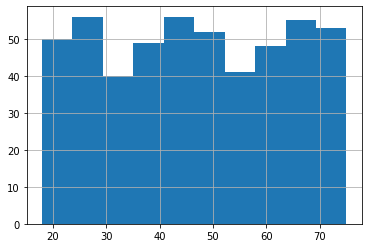

In [316]:
import matplotlib.pyplot as plt 
users['age'].hist()

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

График наглядный, но не забывай подписывать оси на графиках и указывать название для графика

Данные корректны. Переходим к таблице calls, сначала проверим типы данных

In [317]:
calls.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

Cтолбец id стоит привести к типу int, столбец с датой звонка call_date - к формату даты

In [318]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['id'] = calls['id'].astype(int)
calls.dtypes

id                    int64
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Теперь все данные нужных типов. Проверим количественный стобец продолжительности звонка duration на корректность данных

39613

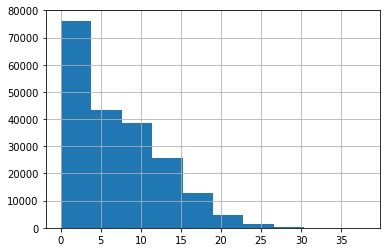

In [319]:
calls['duration'].hist()
calls[calls['duration'] == 0.0]['duration'].count()

Есть одна проблема: у большого количества звонков (их доля 39613/202607 = 0.2) длительность — 0.0 минут. Такие значения могли появиться в результате сбоев при записи дляительности звонка или если вызов так и не удалось совершить. Эти значения серьезно перетягивают статистику, заменить их на среднее тоже нельзя, поэтому придется пожертвовать объемом данных и избавиться от таких записей.

0

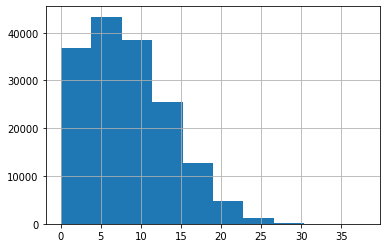

In [320]:
calls['duration'] = calls[calls['duration'] != 0.0]['duration']
calls['duration'].hist()
calls[calls['duration'] == 0.0]['duration'].count()

Звонков длительностью 0.0 не осталось, а звонки малой продолжительности - вполне доступимые значения, поэтому оставим их в таком виде. Переходим к таблице messages: посмотрим типы данных

In [321]:
messages.dtypes

id              object
message_date    object
user_id          int64
dtype: object

Cтолбец id стоит привести к типу int, столбец с датой отправки message_date - к формату даты

In [322]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['id'] = messages['id'].astype(int)
messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

Теперь все данные нужных типов, на корректность проверять нечего. Переходим к таблице internet: посмотрим типы данных

In [323]:
internet.dtypes

Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

Cтолбец id стоит привести к типу int, столбец с датой интернет-сессии session_date - к формату даты, дублирующий индесы столбец Unnamed - удалить

In [324]:
internet = internet[['id', 'mb_used', 'session_date', 'user_id']]
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['id'] = internet['id'].astype(int)
internet.dtypes

id                       int64
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Теперь все данные нужных типов. Проверим количественный стобец с объёмом потраченного за сессию интернет-трафика (в мегабайтах) mb_used на корректность данных

19598

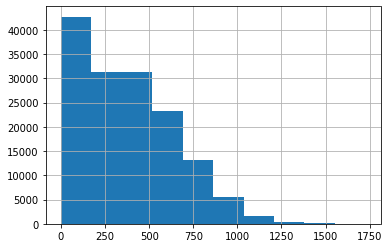

In [325]:
internet['mb_used'].hist()
internet[internet['mb_used'] == 0.0]['mb_used'].count()

у большого количества сессий (их доля 19598/149396 = 0.13) объёмом потраченного за сессию интернет-трафика — 0.0. Такие значения могли появиться в результате сбоев при сборе данных или если не удалось подключиться к интернету. Эти значения серьезно перетягивают статистику, заменить их на среднее тоже нельзя, поэтому придется избавиться от таких записей.

0

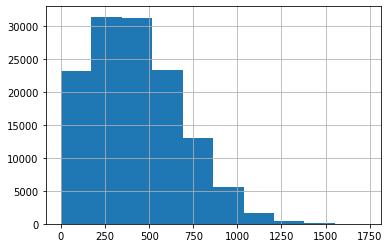

In [326]:
internet['mb_used'] = internet[internet['mb_used'] != 0.0]['mb_used']
internet['mb_used'].hist()
internet[internet['mb_used'] == 0.0]['mb_used'].count()

Данные корректны. Переходим к таблице tariffs

In [327]:
print(tariffs.dtypes)
tariffs

messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Типы даннх подобраны корректно, данные в таблице соответсятвуют описанию тарифов

### Посчитайте для каждого пользователя:

**количество сделанных звонков и израсходованных минут разговора по месяцам**

**количество отправленных сообщений по месяцам**

**объем израсходованного интернет-трафика по месяцам**

**помесячную выручку с каждого пользователя**

У нас есть данные о клиентах за один (2018) год. Создадим таблицу months, со столбцами: 

user_id— уникальный идентификатор пользователя

month - рассматриваемый месяц (его номер - от 1 до 12)

tariff - используемый тариф (0-smart, 1-ultra)

calls - количество сделанных звонков за этот месяц

minutes - количество израсходованных минут разговора за этот месяц

messages - количество отправленных сообщений за этот месяц

mb - объем израсходованного интернет-трафика (в мегабайтах) за этот месяц

revenue - выручка с  пользователя за этот месяц

city - город пользователя (1- москва, 0- другой регион)

Сначала для каждого пользователя создадим по строке для информации о его пользовании услугами за каждый полный месяц, когда он был подключен. Создадим массивы columns с названиями столбцов будующей таблицы и data с информацией для будующей таблицы. Будем циклом проходиться по каждому пользователю (его id) из таблицы users, а затем вложенным циклом - по полным месяцам, когда он был подключен к тарифу, и для каждой пары id-месяц создавать отдельную строку в массиве data (столбцы user_id, month и tariff заполняем, остальные пока оставим нулями)

In [328]:
columns = ['user_id', 'month', 'tariff', 'calls', 'minutes', 'messages', 'mb', 'revenue', 'city']
data = []
for i in range(len(users)):
    for j in range(users.loc[i, 'reg_date'].month, users.loc[i, 'churn_date'].month):
        data.append([users.loc[i,'user_id'], j, users.loc[i,'tariff'], 0, 0, 0, 0, 0, users.loc[i,'city']])
months = pd.DataFrame(columns = columns, data = data)
months.loc[months['tariff'] == 'smart', 'tariff'] = 0
months.loc[months['tariff'] == 'ultra', 'tariff'] = 1
months.loc[months['city'] != 'Москва', 'city'] = 0
months.loc[months['city'] == 'Москва', 'city'] = 1
months = months.pivot_table(index = ['user_id', 'month'])
months.head(20)

calls  city  mb  messages  minutes  revenue  tariff
user_id month                                                     
1000    5          0     0   0         0        0        0       1
        6          0     0   0         0        0        0       1
        7          0     0   0         0        0        0       1
        8          0     0   0         0        0        0       1
        9          0     0   0         0        0        0       1
        10         0     0   0         0        0        0       1
        11         0     0   0         0        0        0       1
1001    11         0     1   0         0        0        0       0
1002    6          0     0   0         0        0        0       0
        7          0     0   0         0        0        0       0
        8          0     0   0         0        0        0       0
        9          0     0   0         0        0        0       0
        10         0     0   0         0        0        0       0
        11         0     0   0         0        0        0       0
1003    8          0     1   0         0        0        0       1
        9          0     1   0         0        0        0       1
        10         0     1   0         0        0        0       1
        11         0     1   0         0        0        0       1
1004    5          0     0   0         0        0        0       1
        6          0     0   0         0        0        0       1

Теперь найдем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. В таблице calls для удовства создадим столбец month с меясцем совершения звонка. Из таблицы  calls сделаем две сводные таблицы с двойной индексацией id пользователя-месяц - calls_pivot_number (число звонков пользователя за месяц)
calls_pivot_duration (их суммарная длительность). Соответствующие значения перепишем в заполняемую таблицу months


In [329]:
calls['month'] = calls['call_date'].dt.month

calls_pivot_number = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'count')
calls_pivot_duration = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')

months['calls'] = calls_pivot_number
months['minutes'] = calls_pivot_duration

months.head(20)

calls  city  mb  messages  minutes  revenue  tariff
user_id month                                                     
1000    5       17.0     0   0         0   150.06        0       1
        6       28.0     0   0         0   158.90        0       1
        7       41.0     0   0         0   318.80        0       1
        8       42.0     0   0         0   389.87        0       1
        9       46.0     0   0         0   440.14        0       1
        10      44.0     0   0         0   328.45        0       1
        11      37.0     0   0         0   319.04        0       1
1001    11      45.0     1   0         0   408.12        0       0
1002    6       14.0     0   0         0   110.37        0       0
        7       21.0     0   0         0   204.75        0       0
        8       37.0     0   0         0   269.71        0       0
        9       25.0     0   0         0   195.85        0       0
        10      24.0     0   0         0   199.48        0       0
        11      25.0     0   0         0   228.03        0       0
1003    8       43.0     1   0         0   355.67        0       1
        9      105.0     1   0         0   904.89        0       1
        10      97.0     1   0         0   809.07        0       1
        11      95.0     1   0         0   775.39        0       1
1004    5        7.0     0   0         0    32.29        0       1
        6       25.0     0   0         0   159.14        0       1

Теперь найдем для каждого пользователя количество отправленных сообщений по месяцам. В таблице messages для удовства создадим столбец month с меясцем отправки сообщения. Из таблицы  messages сделаем сводную таблицу с двойной индексацией id пользователя-месяц - messages_pivot c количеством отправленных сообщений. Соответствующие значения перепишем в заполняемую таблицу months


In [330]:
messages['month'] = messages['message_date'].dt.month

messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

months['messages'] = messages_pivot

months.head(20)

calls  city  mb  messages  minutes  revenue  tariff
user_id month                                                     
1000    5       17.0     0   0      22.0   150.06        0       1
        6       28.0     0   0      60.0   158.90        0       1
        7       41.0     0   0      75.0   318.80        0       1
        8       42.0     0   0      81.0   389.87        0       1
        9       46.0     0   0      57.0   440.14        0       1
        10      44.0     0   0      73.0   328.45        0       1
        11      37.0     0   0      58.0   319.04        0       1
1001    11      45.0     1   0       NaN   408.12        0       0
1002    6       14.0     0   0       4.0   110.37        0       0
        7       21.0     0   0      11.0   204.75        0       0
        8       37.0     0   0      13.0   269.71        0       0
        9       25.0     0   0       4.0   195.85        0       0
        10      24.0     0   0      10.0   199.48        0       0
        11      25.0     0   0      16.0   228.03        0       0
1003    8       43.0     1   0      37.0   355.67        0       1
        9      105.0     1   0      91.0   904.89        0       1
        10      97.0     1   0      83.0   809.07        0       1
        11      95.0     1   0      94.0   775.39        0       1
1004    5        7.0     0   0      95.0    32.29        0       1
        6       25.0     0   0     134.0   159.14        0       1

Аналогично работая с таблицей internet найдем объем израсходованного интернет-трафика по месяцам

In [331]:
internet['month'] = internet['session_date'].dt.month

internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

months['mb'] = internet_pivot

months.head(20)

calls  city        mb  messages  minutes  revenue  tariff
user_id month                                                           
1000    5       17.0     0   2253.49      22.0   150.06        0       1
        6       28.0     0  23233.77      60.0   158.90        0       1
        7       41.0     0  14003.64      75.0   318.80        0       1
        8       42.0     0  14055.93      81.0   389.87        0       1
        9       46.0     0  14568.91      57.0   440.14        0       1
        10      44.0     0  14702.49      73.0   328.45        0       1
        11      37.0     0  14756.47      58.0   319.04        0       1
1001    11      45.0     1  18429.34       NaN   408.12        0       0
1002    6       14.0     0  10856.82       4.0   110.37        0       0
        7       21.0     0  17580.10      11.0   204.75        0       0
        8       37.0     0  20319.26      13.0   269.71        0       0
        9       25.0     0  16691.08       4.0   195.85        0       0
        10      24.0     0  13888.25      10.0   199.48        0       0
        11      25.0     0  18587.28      16.0   228.03        0       0
1003    8       43.0     1   8565.21      37.0   355.67        0       1
        9      105.0     1  12468.87      91.0   904.89        0       1
        10      97.0     1  14768.14      83.0   809.07        0       1
        11      95.0     1  11356.89      94.0   775.39        0       1
1004    5        7.0     0  13403.98      95.0    32.29        0       1
        6       25.0     0  17600.02     134.0   159.14        0       1

Осталось найти помесячную выручку с каждого пользователя
Для этого напишем функцию find_revenue, которая вычтиает бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика (если он превышен); остаток умножается на значение из тарифного плана; прибавляетсяте абонентская плату, соответствующую тарифному плану.

In [332]:
def find_revenue(row):
    revenue = 0
    if row['tariff'] == 0:
        if (int(row['minutes'] - 500 + 1)) > 0:
            revenue += (int(row['minutes'] - 500 + 1))*3
        if (int(row['messages'] - 50)) > 0:
            revenue += (int(row['messages'] - 50))*3
        if (int(row['mb']/1024 + 1) - 15) > 0:
            (int(row['mb']/1024 + 1) - 15)*200
        revenue += 550
                        
    else:
        if (int(row['minutes'] - 3000 + 1)) > 0:
            revenue += (int(row['minutes'] - 3000 + 1))*1
        if (int(row['messages'] - 1000)) > 0:
            revenue += (int(row['messages'] - 1000))*1
        if (int(row['mb']/1024 + 1) - 30) > 0:
            revenue += (int(row['mb']/1024 + 1) - 30)*15
        revenue += 1950
    return(revenue)

Прежде чем применять эту функцию к таблице months, заменим пустые значения в этой таблице на нули, так как пустые значения как раз показывают, что за этот месяц таких операций не было. При этом все значения в столбцах из нулей и единиц tariff и city не пострадают, так как там нет пустых значений.

In [333]:
print(months.isnull().sum())
months = months.fillna(0)
print(months.isnull().sum())

calls        34
city          0
mb           10
messages    420
minutes      34
revenue       0
tariff        0
dtype: int64
calls       0
city        0
mb          0
messages    0
minutes     0
revenue     0
tariff      0
dtype: int64


Теперь можно применить функцию find_revenue к таблице months методом apply и получить столбец с прибылью revenue

In [334]:
months['revenue'] = months.apply(find_revenue, axis = 1)   
months.head(20)

calls  city        mb  messages  minutes  revenue  tariff
user_id month                                                           
1000    5       17.0     0   2253.49      22.0   150.06     1950       1
        6       28.0     0  23233.77      60.0   158.90     1950       1
        7       41.0     0  14003.64      75.0   318.80     1950       1
        8       42.0     0  14055.93      81.0   389.87     1950       1
        9       46.0     0  14568.91      57.0   440.14     1950       1
        10      44.0     0  14702.49      73.0   328.45     1950       1
        11      37.0     0  14756.47      58.0   319.04     1950       1
1001    11      45.0     1  18429.34       0.0   408.12      550       0
1002    6       14.0     0  10856.82       4.0   110.37      550       0
        7       21.0     0  17580.10      11.0   204.75      550       0
        8       37.0     0  20319.26      13.0   269.71      550       0
        9       25.0     0  16691.08       4.0   195.85      550       0
        10      24.0     0  13888.25      10.0   199.48      550       0
        11      25.0     0  18587.28      16.0   228.03      550       0
1003    8       43.0     1   8565.21      37.0   355.67     1950       1
        9      105.0     1  12468.87      91.0   904.89     1950       1
        10      97.0     1  14768.14      83.0   809.07     1950       1
        11      95.0     1  11356.89      94.0   775.39     1950       1
1004    5        7.0     0  13403.98      95.0    32.29     1950       1
        6       25.0     0  17600.02     134.0   159.14     1950       1

### Вывод

Данные привелены к нужным типам, ошибки в данных исправлены. 

Для каждого пользователя найдены:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячная выручка с каждого пользователя

и записаны в таблицу months.

Данные готовы к анализу

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Этап предобработки закончен, со всеми действиями и выводами согласен, замечательно. Так же порадовало что всё делишь на отдельные ячейки и пишешь выводы, можно приступать к основной части анализа</div>

## Шаг 3. Анализ данных

**Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.**

Для удобства добавим в таблицу months столбец gb - где будем хранить потраченный объем трафика в гигобайтах

Разделим таблицу months на две: 

months_smart - пользователи с тарифом смарт

и months_ultra - пользователи тарифа ультра

In [335]:
months['gb'] = months['mb']/1024
months_smart = months[months['tariff'] == 0]
months_ultra = months[months['tariff'] == 1]

Сначала разберемся с тем, сколько минут разговора  требуется пользователям каждого тарифа в месяц. Для каждого тарифа посчитаем среднее количество, дисперсию и стандартное отклонение (с учетом того, что у нас не все данные, а лишь выборка) и построим гистограммы

CМАРТ
Среднее: 385.543022884513
Дисперсия: 31051.727017587866
Стандартное отлонение: 176.2150022489228
Гистограмма:


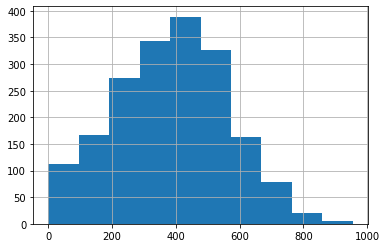

УЛЬТРА
Среднее: 490.21366786140976
Дисперсия: 86651.84668856421
Стандартное отлонение: 294.3668573201885
Гистограмма:


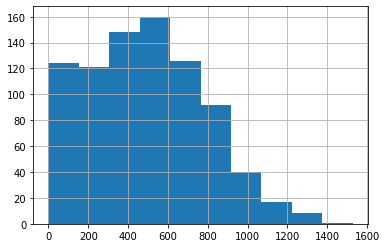

In [336]:
import numpy as np

mean_minutes_smart = months_smart['minutes'].mean()
mean_minutes_ultra = months_ultra['minutes'].mean()

variance_minutes_smart = np.var(months_smart['minutes'], ddof=1)
variance_minutes_ultra = np.var(months_ultra['minutes'], ddof=1)

std_minutes_smart = np.sqrt(variance_minutes_smart)
std_minutes_ultra = np.sqrt(variance_minutes_ultra)

print('CМАРТ')
print('Среднее:', mean_minutes_smart)
print('Дисперсия:', variance_minutes_smart)
print('Стандартное отлонение:', std_minutes_smart)
print('Гистограмма:')
months_smart['minutes'].hist()
plt.show()

print('УЛЬТРА')
print('Среднее:', mean_minutes_ultra)
print('Дисперсия:', variance_minutes_ultra)
print('Стандартное отлонение:', std_minutes_ultra)
print('Гистограмма:')
months_ultra['minutes'].hist()
plt.show()

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Графики точно нужно строить детальнее, иначе так из графика не понятно, что изображено, если не залазить в код, а заказчики в будущем точно не будут копать в коде, чтобы понять, что перед ними изображено

У обоих распределений большое стандартное отклонение, при этом для них выполняется правило 3 сигм, а значит распределения нормальные. Среднее значение по тарфу смарт примерно на 100 минут меньше, чем по тарифу ультра. При этом распределение потраченных минут для тарифа смарт практически симметрично, а для ультра - значительно скошен влево, а значит там есть пользователи, которые тратят ощутимо больше медианного количества. На этих клиентов стоит обратить особое внимание.

Теперь разберемся с тем, сколько сообщений  требуется пользователям каждого тарифа в месяц. Для каждого тарифа посчитаем среднее количество, дисперсию и стандартное отклонение (с учетом того, что у нас не все данные, а лишь выборка) и построим гистограммы

CМАРТ
Среднее: 33.005321979776475
Дисперсия: 773.9445935996815
Стандартное отлонение: 27.81985969769944
Гистограмма:


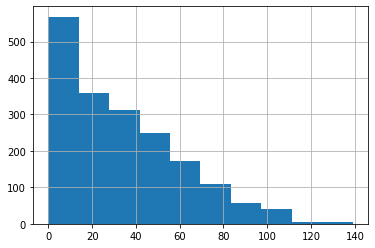

УЛЬТРА
Среднее: 47.82078853046595
Дисперсия: 2207.1281319133614
Стандартное отлонение: 46.980082289342164
Гистограмма:


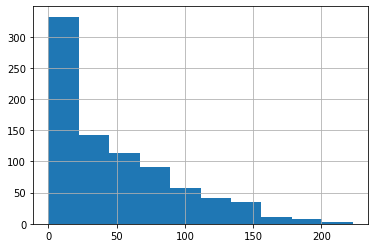

In [337]:
mean_messages_smart = months_smart['messages'].mean()
mean_messages_ultra = months_ultra['messages'].mean()

variance_messages_smart = np.var(months_smart['messages'], ddof=1)
variance_messages_ultra = np.var(months_ultra['messages'], ddof=1)

std_messages_smart = np.sqrt(variance_messages_smart)
std_messages_ultra = np.sqrt(variance_messages_ultra)

print('CМАРТ')
print('Среднее:', mean_messages_smart)
print('Дисперсия:', variance_messages_smart)
print('Стандартное отлонение:', std_messages_smart)
print('Гистограмма:')
months_smart['messages'].hist()
plt.show()

print('УЛЬТРА')
print('Среднее:', mean_messages_ultra)
print('Дисперсия:', variance_messages_ultra)
print('Стандартное отлонение:', std_messages_ultra)
print('Гистограмма:')
months_ultra['messages'].hist()
plt.show()

Среднее по тарифу смарт примерно на 15 сообщение (в 2/3) меньше, чем по тарифу ультра. При этом оба распределения очень сильно скошены влево, так что на нормальные распределения они не похожи вообще. Очень много людей если и пользуются сообщениями, то очень редко (скорее всего из-за популярности социальных сетей), но есть и те, кто отправляет более 100 сообщений в месяц (а на тарифе ультра - и все 200), на это следует обратить особое внимание

Теперь разберемся с тем, какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Для каждого тарифа посчитаем среднее количество, дисперсию и стандартное отклонение (с учетом того, что у нас не все данные, а лишь выборка) и построим гистограммы

CМАРТ
Среднее: 15.528371926348788
Дисперсия: 32.66189196925468
Стандартное отлонение: 5.715058352217822
Гистограмма:


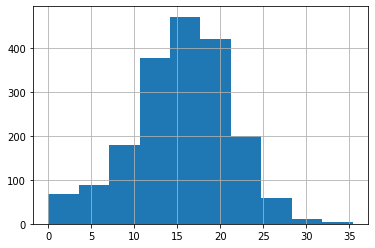

УЛЬТРА
Среднее: 18.770276389355587
Дисперсия: 94.184619341726
Стандартное отлонение: 9.704876060090928
Гистограмма:


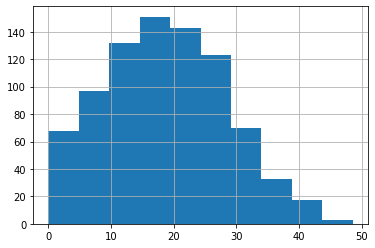

In [338]:
mean_gb_smart = months_smart['gb'].mean()
mean_gb_ultra = months_ultra['gb'].mean()

variance_gb_smart = np.var(months_smart['gb'], ddof=1)
variance_gb_ultra = np.var(months_ultra['gb'], ddof=1)

std_gb_smart = np.sqrt(variance_gb_smart)
std_gb_ultra = np.sqrt(variance_gb_ultra)

print('CМАРТ')
print('Среднее:', mean_gb_smart)
print('Дисперсия:', variance_gb_smart)
print('Стандартное отлонение:', std_gb_smart)
print('Гистограмма:')
months_smart['gb'].hist()
plt.show()

print('УЛЬТРА')
print('Среднее:', mean_gb_ultra)
print('Дисперсия:', variance_gb_ultra)
print('Стандартное отлонение:', std_gb_ultra)
print('Гистограмма:')
months_ultra['gb'].hist()
plt.show()

Среднее по тарифу смарт примерно на 3 гб (в 1/6) меньше, чем по тарифу ультра. При этом оба распределения похожи на симметричные с небольшим смещением влево, то есть есть достаточно пользователей, которым нужно меньше гигобайт, или вообще не нуджны (причем по обоим тарифам). Однако действует правилр трех сигм, распределения похожи на нормальные. По тарифу смарт дается 15 гб интернета, среднее потраченного чуть выше этого значения; по тарифу ультра - 30, среднее - значительно ниже. Возможно, стоит пересмотреть встроенные пакеты интернета.

### Вывод

Как и ожидалось, в этой выборке в среднем пользователи тарифа смарт тратят меньше минут разговора, сообщений и интернет-трафика в месяц, чем пользователи тарифа ультра. Практически все распределения скошены влево, а значит есть пользователи, которым нужно значительно больше перечисленных услуг, чем средним. Возможно, стоит разработать для таких клиентов особый подход.

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Тут всё абсолютно верно, верные выводы, но стоило бы строить больше разнообразных визуализаций, это будет очень важным навыком , который точно пригодится тебе в будущем, так как в любой аналитике графики являются наглядным подтверждением твоих выводов

## Шаг 4. Проверьте гипотезы

1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

Установим пороговое значение alpha - 5%

In [339]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

### 1

H₀ всегда формулируется так, чтобы использовать знак равенства (чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти). Поэтому в первом случае нулевая гипотеза Н0: 

"средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается"

Так как наша задача - выяснить, какой тариф приносит больше денег, то альтернативную гипотезу сформулируем так Н1:

"средняя выручка пользователей тарифа «Ультра» больше чем пользователей тарифа «Смарт»"

(гипотеза односторонняя, поэтому pvalue будем делить на 2, а также использовать дополнительное сравнение при решении об отвержении нулевой гипотезы)

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var) .

Так как выборки взяты из схожих по параметрам совокупностей, дисперсия каждой выборки нужно оцененивать по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой (equal_var = True).

In [340]:
from scipy import stats as st

results = st.ttest_ind(
    months_smart['revenue'], 
    months_ultra['revenue'])

print('p-значение:', results.pvalue/2)

if (results.pvalue/2 < alpha) and\
(months_smart['revenue'].mean() < months_ultra['revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, и такое различие можно получить случайно с вероятностью в 0%. Это явно слишком слишком слишком малая вероятность, чтобы делать вывод о равенстве средней прибыли. Также выполнено условие: среднее по  выручке пользователей тарифа «Ультра» больше чем пользователей тарифа «Смарт». Поэтому нулевую гипотезу отвергаем: нельзя сказать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, а альтернативную оставляем: вполне возсожно, что средняя выручка пользователей тарифа «Ультра» больше чем пользователей тарифа Смарт

### 2

Аналогично поступаем со второй гипотезой:

Н0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Н1: средняя выручка пользователей из Москвы больше выручки пользователей из других регионов

In [341]:
results = st.ttest_ind(
    months[months['city'] == 0]['revenue'], 
    months[months['city'] == 1]['revenue'])

print('p-значение:', results.pvalue/2)

if (results.pvalue/2 < alpha) and \
(months[months['city'] == 0]['revenue'].mean() < months[months['city'] == 1]['revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0006521921774210396
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что только с вероятностью в 0.1%  различие средней выручки пользователей из Москвы и из других регионов можно получить случайной. Это явно слишком маленькая вероятность, чтобы оставить нулевую гипотезу. Таким образом, нельзя сказать, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Однако гипотеза о том, что средняя выручка пользователей из Москвы больше выручки пользователей из других регионов имеет место быть.

### Вывод

Ни одну из нулевых гипотез не удалось признать возможной. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, и средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. При этом гипотезы о том, что средняя выручка пользователей из Москвы больше выручки пользователей из других регионов, а средняя выручка пользователей тарифа «Ультра» больше чем пользователей тарифа «Смарт» имеют право на существование. Таким образом, коммерческому департаменту следует уделить больше внимания на пользователей из Москвы и  тариф Ультра.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Гипотезы проверены, молодец!)

### Шаг 5. Общий вывод

Был проведен предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год) и поведения клиентов.

Выяснилось, что в этой выборке в среднем пользователи тарифа Смарт в месяц тратят 385 минут звонков (меньше включенного количества), отправляют 33 сообщения (меньше включенного количества) и используют 15 гигобайт интернета (примерно равно включенным в пакет), а пользователи тарифа Ультра - 490 минут звонков (значительно меньше включенного количества), 47 сообщений (значительно меньше включенного количества) и 18 гигобайт интернета (меньше включенного количества). 

Однако по одному среднему из выборки нельзя делать серьезных выводов, ведь все значительно меняется от пользователя к пользователю. 

А при проверке гипотез выяснилось две возможные закономерности: 

1)прибыль от пользователей, использующих тариф Ультра, выше, чем от пользователей, использующих тариф Смарт

2)прибыль от пользователей из Москвы выше, чем от пользователей из других регионов.

Поэтому коммерческому департаменту следует обратить внимание на пользователей из Москвы и тариф Ультра: там можно найти подход, который повысит прибыль.




<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Вывод получился достаточно точным и подробным, здорово! 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Ты проделала отличную работу и я очень рад, что у тебя всё получается!) Надеюсь так будет и в будущем и ты останешься полностью довольна данным курсом!) Удачи тебе в следующих проектах)